Compare two different embeddings from the doc2vec by sampling a subset of pairs and calculating the respective distances.
We then calculate the rank-correlation between the two different lists of measured distances.

This quantifies how much two different embeddings correspond to each other

- we do not care about the absolute value of the distance
- but is the relation between the distances conserved across different models

In [4]:
import numpy as np
import pylab as plt
import os,sys
import pandas as pd
import glob
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import pdist,cdist
from matplotlib.ticker import NullFormatter

%matplotlib inline  
%load_ext autoreload
%autoreload 2

## add src-path
src_dir = os.path.abspath(os.path.join(os.pardir,os.pardir,'src'))
sys.path[0] = src_dir

from common.stats import *
from scipy.stats import kendalltau,spearmanr

In [13]:


path_read = '../../results/doc2vec_robustness'
path_save = '../../results/doc2vec_robustness'

## parameters
N_pairs = 10**6 # howmany pairs to compare
# n_seed = 10
metric = 'euclidean' # which metric to use, default: cosine


binwidth=0.01
alpha=0.01

In [14]:
fname_read = 'doc2vec_2dproj_m100-5-5-0_comparison_distances_euclidean_1M_N1000000'


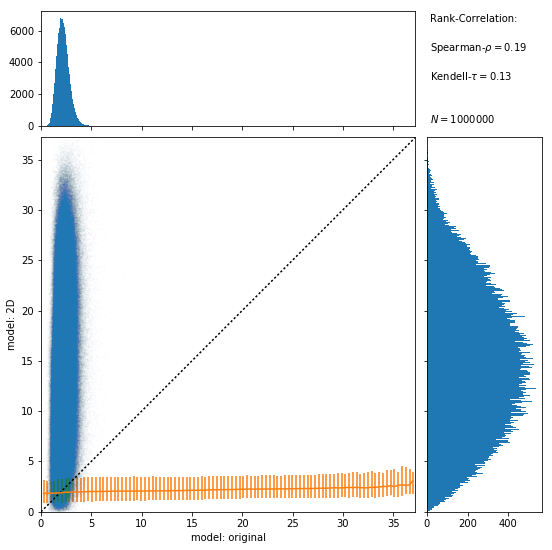

In [17]:
filename = os.path.join(path_read,fname_read)
with open(filename,'r') as f:
    x=f.readlines()


list_dist_x1 = [float(h.split()[0]) for h in x]
list_dist_x2 = [float(h.split()[1]) for h in x]
C_k = kendalltau(list_dist_x1,list_dist_x2)
C_s = spearmanr(list_dist_x1,list_dist_x2)

## prepare plot
nullfmt = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
x = list_dist_x2
y = list_dist_x1

## make plot
N_ = len(list_dist_x1)
plt.figure(1, figsize=(8, 8))
plt.clf()
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# now determine nice limits by hand:
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, lim))
axScatter.set_ylim((0, lim))

# the scatter plot:
axScatter.plot(x, y,alpha=alpha,ms=1,marker='o',lw=0,rasterized=True)


arr_bins = np.linspace(0,lim,100)
x_med,y_med,y_err = cond_median(list_dist_x1,list_dist_x2,arr_bins,y_perc = [2.5,97.5])
axScatter.errorbar(x_med,y_med,yerr=y_err)
axScatter.plot([0,lim],[0,lim],ls=':',color='black')
# ax.set_xlabel('cosine - dataset1')
# ax.set_ylabel('cosine - dataset2')



bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axScatter.set_xlabel('model: original')
axScatter.set_ylabel('model: 2D')
plt.figtext(0.775,0.95,'Rank-Correlation:')
plt.figtext(0.775,0.9,r'Spearman-$\rho = %.2f$'%(C_s[0]))
plt.figtext(0.775,0.85,r'Kendell-$\tau = %.2f$'%(C_k[0]))
plt.figtext(0.775,0.775,r'$N = %d$'%(N_pairs))

# filename = 'doc2vec_m%s_m%s_comparison_distances_%s_N%d.png'%(model1,model2,metric,N_pairs)
# plt.savefig(os.path.join(path_save,filename),dpi=300)
